## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
'''BASIC INFORMATION ABOUT THE DATASET'''
# leading_page mentions the page that an individual was diverted to when they opened the website
# control group deals with those who received the old page
# treament group deals with those who received the new page
# converted value of 1 means they converted the landing_page into the other type
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
x1 = ((df.query('group == "treatment" and landing_page != "new_page"'))).count()[0]
x2 = ((df.query('group != "treatment" and landing_page == "new_page"'))).count()[0]
x1+x2

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#getting the false observations in each case alone
df_treatment_false = df[(df['group']=='treatment') & (df['landing_page'] == 'old_page')]
df_control_false   = df[(df['group']=='control') & (df['landing_page'] == 'new_page')]

#Appending the two false observations dataframes to drop
df_false = df_treatment_false.append(df_control_false)
#we use .index, so we can drop the row
df2 = df.drop(df_false.index,axis=0)
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#getting number of unique vlaues
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#obtaining the duplicated user_id
df2[df2.duplicated(subset = 'user_id')]['user_id'].values[0]

773192

In [12]:
#we use this to elaporate the similarity between the duplicated user id data
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
#finding out the duplicated user_id row
df2[df2.duplicated(subset = 'user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#dropping the duplicated user id
df2 = df2.drop_duplicates(subset='user_id')
#to make sure that the duplicated row is deleted
df2.duplicated(subset = 'user_id').sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#P(A) = received new page
#P(B) = group is control
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#P(A|B)
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#P(!A|!B)
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
(df2.query('landing_page == "new_page"').shape[0]) / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the fact that 50% of individuals of the sample received the new page, so there is enough data to compare between the two sides of the sample as both proportions are equal** \
*Data showed that more people converted to the new page, the difference is not big though, it is only 0.15% which would only represent 290 more individuals out of a dataset of 290,000 individuals*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis,         Ho: Pold - Pnew >=0 \
  Altenrate hypothesis,    H1: Pold - Pnew <0 \
  Alpha "Type I error" = 0.05 \
  P_success = converted rate**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
'STEP 2'
#Pnew = Pold = converted rate in dataset
#Hnull     : Pnew - Pold = 0
#Halternate: Pnew - Pold != 0
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#Pnew = Pold = converted rate in dataset
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
n_new = df2[df2['landing_page']=='new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#'sampling Distribution'
#df['converted'] used instead of [0,1],p=[1-pnew,pnew] since we are already assuming Pnew = df.mean
new_page_converted = np.random.choice(df2['converted'], n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#'sampling Distribution'
#df['converted'] used instead of [0,1],p=[1-pold,pold] since we are already assuming Pold = df.mean
old_page_converted = np.random.choice(df2['converted'], n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
#We dont need to convert it using np.array since it is already a np. array
delta_P = (new_page_converted).mean() - (new_page_converted).mean()
delta_P

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
#Bootstrapping 
p_diffs = []
for i in range(10000):
    sample = df2.sample(df2.shape[0], replace = True)
    new_page_converted = np.random.choice(df2['converted'], n_new).mean()
    old_page_converted = np.random.choice(df2['converted'], n_old).mean()
    delta = new_page_converted - old_page_converted
    p_diffs.append(delta)
p_diffs
p_diffs = np.array(p_diffs)

In [27]:
#showing np array of p_diffs
p_diffs

array([ 0.00017001, -0.00219078, -0.00136483, ..., -0.00178473,
       -0.00024998,  0.00094087])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

**Data is shown as a normally distributed histogram which was expected.. Also we can vsiualize the observed difference of the histogram as well**

In [28]:
#sample observation difference, assumed null difference, Pval, null hypothesis, alpha
null = np.random.normal(0, np.std(p_diffs), df2.shape[0])
obs_diffs = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
#since in the null hypothesis zero is separating between two hypothesis
null_diff = 0
#alpha threshold

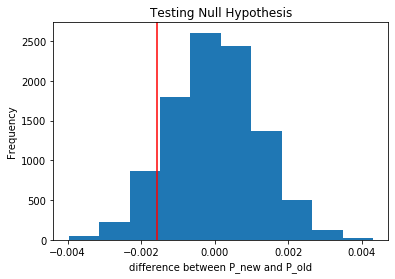

In [29]:
plt.hist(p_diffs)
plt.axvline(obs_diffs,color='red')
plt.title('Testing Null Hypothesis')
plt.xlabel('difference between P_new and P_old')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#values extremely greater than the observed difference which is the upper bound here is
#the possibility that we see higher values of differne in null thesis than in actual
#reprhrased as (Pold - Pnew)Null > (Pold-Pnew)observed, and the negative value cancels each other
Prop_high = (null>obs_diffs).mean() 
#values extremely lower than the observed difference which is the upper bound here is
Prop_low = (((null_diff)-(obs_diffs-null))<null).mean()
#P_value which determines the probability of observing your dataset in your null hypothesis
#given that the null hypothesis is true
P_value = Prop_high + Prop_low
alpha = 0.05
#calculating P-val as summatin of upper bound and lower bound
#P_val = ((null>obs_diffs).mean() + (((null_diff)-(obs_diffs-null))<null).mean())
Prop_high , Prop_low, P_value, P_value - alpha

(0.9050222999201608, 0.0, 0.9050222999201608, 0.8550222999201608)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**since P_value is large and approaching 1, this indicates that null hypothesis is true and we fail to reject it since it represents the statistics.** \
*Also, P_value is higher than alpha which assures that we can't reject null hypothesis* \
*This means that the older page is better than the newer page as per Null hypothesis assumption*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm
#convert_old and convert_new are the number of successes
convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
#n_old and n_new are the number of iterations for the hypothesis
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
                             '''Please Note that the hyperlink is not working'''
#statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
#nobs is no. of successes, while value is the number of iteration
# larger means that the alternative hypothesis ``prop > value
#alternative hypothesis comes first before null hypothesis, and alternative refers to the first one
#I here assume that Null Hypothesis: value> prop which is ()
z, p = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')
z,p

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean.** \
*If a Z-score is 0, it indicates that the data point's score is identical to the mean score* \
*R squared and z score show similar results here which shows that 90% of our data at least approves the null hypothesis*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In [33]:
import statsmodels.api as sm
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df_reg = df2.copy()
#adding intercept column
df_reg['intercept'] = 1
#getting dummy columns for group which same as landing_page
df_reg[['old_page','ab_page']] = pd.get_dummies(df['group'])
#keeping only one column of dummies to get a full rank matrix
df_reg.drop(columns = ['old_page','group','landing_page'], inplace = True)
df_reg.head()

,user_id,timestamp,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,0,1,0
1,804228,2017-01-12 08:01:45.159739,0,1,0
2,661590,2017-01-11 16:55:06.154213,0,1,1
3,853541,2017-01-08 18:28:03.143765,0,1,1
4,864975,2017-01-21 01:52:26.210827,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
log = sm.Logit(df_reg['converted'],df_reg[['intercept','ab_page']])
results = log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-07-31 07:34 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P value is 0.189 for ab_page which is low that it shows there is little statistical significance since it is approaching zero** \
*R-squared value is zero which suggests that there is no chance to fit the data using a linear model* \
Null hypothesis with regression model: Hnull: population coefficient = zero \
**Please note that the shown results of conversion is related to the baseline**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**since R-squared value is zero, so we can't make a linear regression model, and since we have p value not very small but kind of small, so it means that statistical significance is not  high, so more other factors should be investigated that can improves our understanding of the dataset**
*There might be some disadvantages of adding other factors that they may be dependent on factors alreaddy presented here which may show unstable results.. \
Also they may not show improvement as it depends on the dataset*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df_reg.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,converted,intercept,ab_page
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,0,1,0
928468,US,2017-01-23 14:44:16.387854,0,1,1
822059,UK,2017-01-16 14:04:14.719771,1,1,1
711597,UK,2017-01-22 03:14:24.763511,0,1,0
710616,UK,2017-01-16 13:14:44.000513,0,1,1


In [38]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.drop(columns = ['CA'])
df_new['intercept'] = 1
df_new.head()

,country,timestamp,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
### Fit Your Linear Model And Obtain the Results
log2 = sm.Logit(df_new['converted'],df_new[['intercept','UK','US','ab_page']])
results2 = log2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2020-07-31 07:35 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

In [47]:
Duration_of_Testing = pd.to_datetime(df['timestamp']).max() - pd.to_datetime(df['timestamp']).min()
Duration_of_Testing

Timedelta('21 days 23:59:49.081927')

## Conclusions

**Summary results and statistical reasoning** \
*It is shown that R squared value is not affected by adding new features of countries, still zero* \
*It is shown that there is still no statistical significancy in the dataset, that p values are small as well but still higher than alpha which refers that Null Hypothesis should be still used even after adding new featueres* \
*It can be seen from Rsquared value that a linear relationship is not fitting the dataset* \
*It can be obvious from our previous statistics that we failed to reject the null hypothesis, which in summary means that our new page does not have the expected effect we had.* \
*There might have been required additional features such as the time which each individual spends on the website, the courses they applied for... It is also important to determine whether all the data obtained from new, old, or both new and old users because it might lead us to mis-interpretation for data.
*we can see from the summary that there is interference between confidence intervals of both US and UK referred tot the baseline of CA*

**Practical significance** \
*We should take other,non related to dataset, features that may affect our decision to take* \
*maybe it is required to make small changes to the website whose feature are not presented here and re-test the dataset agian later* \
*Also, we should take into consideration the timeframe at which this dataset was gathered, and since it was very short time, so it might have been a busy time for individuals, so they were not having enough time to explore the new page.

**Weakness points of the dataset** \
*Time frame for observing sample was very small, only 21 days, which is not enough at all for making a strong accurate decision about performance of the new page*
*There were some mistakes in data such as control group whose observations were landing on new_page, so we had to drop those data*



## Resources 

*Stackoverflow* \
*statsmodels.org*


<a id='conclusions'></a>

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.